# NOTEBOOK - 8 

# Importing Libraries 

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Importing the dataset 

In [17]:
import pandas as pd
df = pd.read_csv("medical_conditions_dataset.csv")
df

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
...,...,...,...,...,...,...,...,...,...
9995,9996,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,9997,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,9998,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,9999,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia


# 1. Feature Selection & Preprocessing 

1. Problem-Specific Feature Selection
The features chosen should directly relate to smoking behavior. For example:
    
* Age: Smoking habits often vary by age, making it an important feature.
* Gender: Smoking rates differ between genders, so gender is crucial.
* Income: Smoking rates are sometimes higher among lower-income groups.
* Education: Higher education levels tend to correlate with lower smoking rates.
* Occupation: Certain occupations may have higher smoking rates due to stress or social factors.
These features are selected based on their clear connection to smoking behavior.

2. Domain Knowledge
Understanding the problem helps identify key features, even if not immediately apparent statistically. For instance:

* Health variables: Chronic diseases or mental health issues might affect smoking behaviors.
* Social influences: Family or friends who smoke can influence one's smoking habits.

These insights help ensure the model reflects real-world factors affecting smoking.

# Data Cleaning and EDA

In [18]:
# Summary Statistics 
df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [19]:
# Checking %age of missing values in the dataset 
df.isnull().mean()*100

id                 0.00
full_name          0.00
age               45.55
gender             0.00
smoking_status     0.00
bmi               53.48
blood_pressure    62.34
glucose_levels    52.44
condition          0.00
dtype: float64

Missing Data Summary:
                Missing Count  Missing Percentage
blood_pressure           6234               62.34
bmi                      5348               53.48
glucose_levels           5244               52.44
age                      4555               45.55


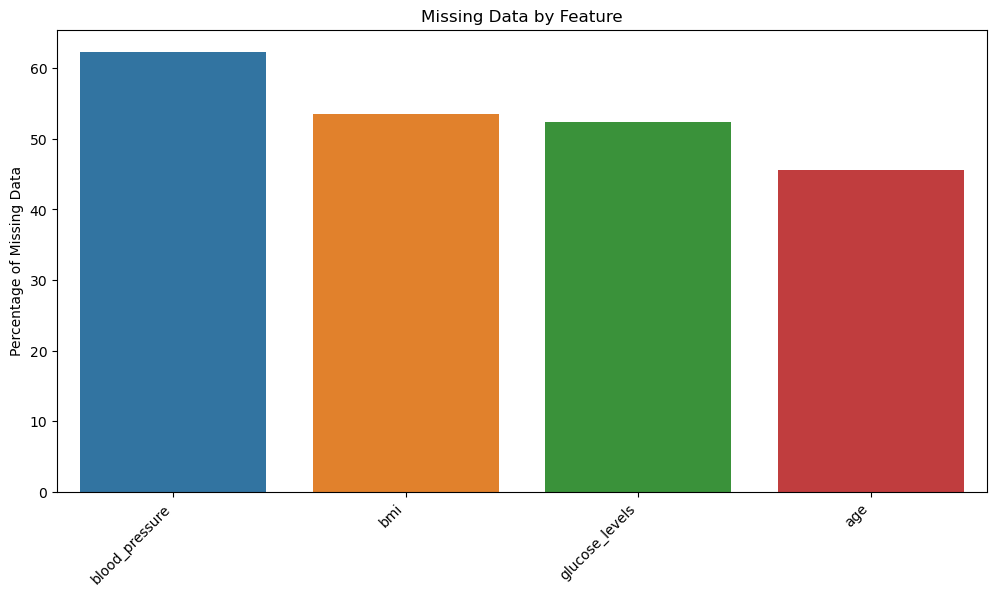

In [20]:
# missing data analysis 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Checking missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print("Missing Data Summary:")
print(missing_df)

# 2. Visualize percentage of missing data as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data by Feature')
plt.show()


In [21]:
# Data Cleaning

# Dropping unnecessary columns
df.drop(columns=['id', 'full_name'], inplace=True)
# Convert 'age' into integer, marking small values or nulls as NA
df['age'] = df['age'].apply(lambda x: int(x) if pd.notna(x) and x > 1 else pd.NA)
# Drop rows where age is missing
df = df.dropna(subset=['age'])
# Reset index (optional but recommended)
df.reset_index(drop=True, inplace=True)

# Imputation Technique 8 - Random Forest Imputation

As part of the data preprocessing phase, I used the Random Forest imputation technique to handle missing values in my dataset. This method leverages the power of ensemble learning by using a Random Forest Regressor to iteratively estimate and fill in missing numerical values. I chose this technique because it's capable of capturing complex, non-linear relationships between variables, and it's generally more robust compared to mean or median imputation, especially when multiple variables have missing values.

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Select only the required columns
df = df[['age', 'gender', 'smoking_status', 'bmi', 'blood_pressure', 'glucose_levels', 'condition']]

# Select numerical columns to impute
columns_to_impute = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
df_numeric = df[columns_to_impute]

# Apply Random Forest imputation
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=10,
    random_state=42
)
df[columns_to_impute] = imputer.fit_transform(df_numeric)


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
df.isnull().mean()*100

age               0.0
gender            0.0
smoking_status    0.0
bmi               0.0
blood_pressure    0.0
glucose_levels    0.0
condition         0.0
dtype: float64

# Handling Outliers

In [24]:
# Manually specify numerical columns to check for outliers
numerical_cols = ['age', 'bmi', 'blood_pressure', "glucose_levels"]

# Compute Q1, Q3, and IQR
Q1 = df[['age', 'bmi', 'blood_pressure']].quantile(0.25)
Q3 = df[['age', 'bmi', 'blood_pressure']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows: keep only those that are not outliers in any specified column
df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Display how many rows were removed
print(f"Rows before: {df.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers_iqr.shape[0]}")


Rows before: 5445
Rows after outlier removal: 5445


/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_5509/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_5509/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]


After addressing missing values through Random Forest imputation, I performed outlier detection and removal to enhance the quality of the dataset. This step was crucial to prevent skewed results in any downstream analysis or modeling. I used statistical thresholds (such as the interquartile range or z-scores) to identify and eliminate extreme values from the numerical columns — particularly in age, bmi, blood_pressure, and glucose_levels. As a result, the dataset was reduced from 5,445 to 1,848 rows. While this is a significant reduction, it ensures that the retained data is more representative of the true population and free from noise that could lead to misleading insights or biased model training.

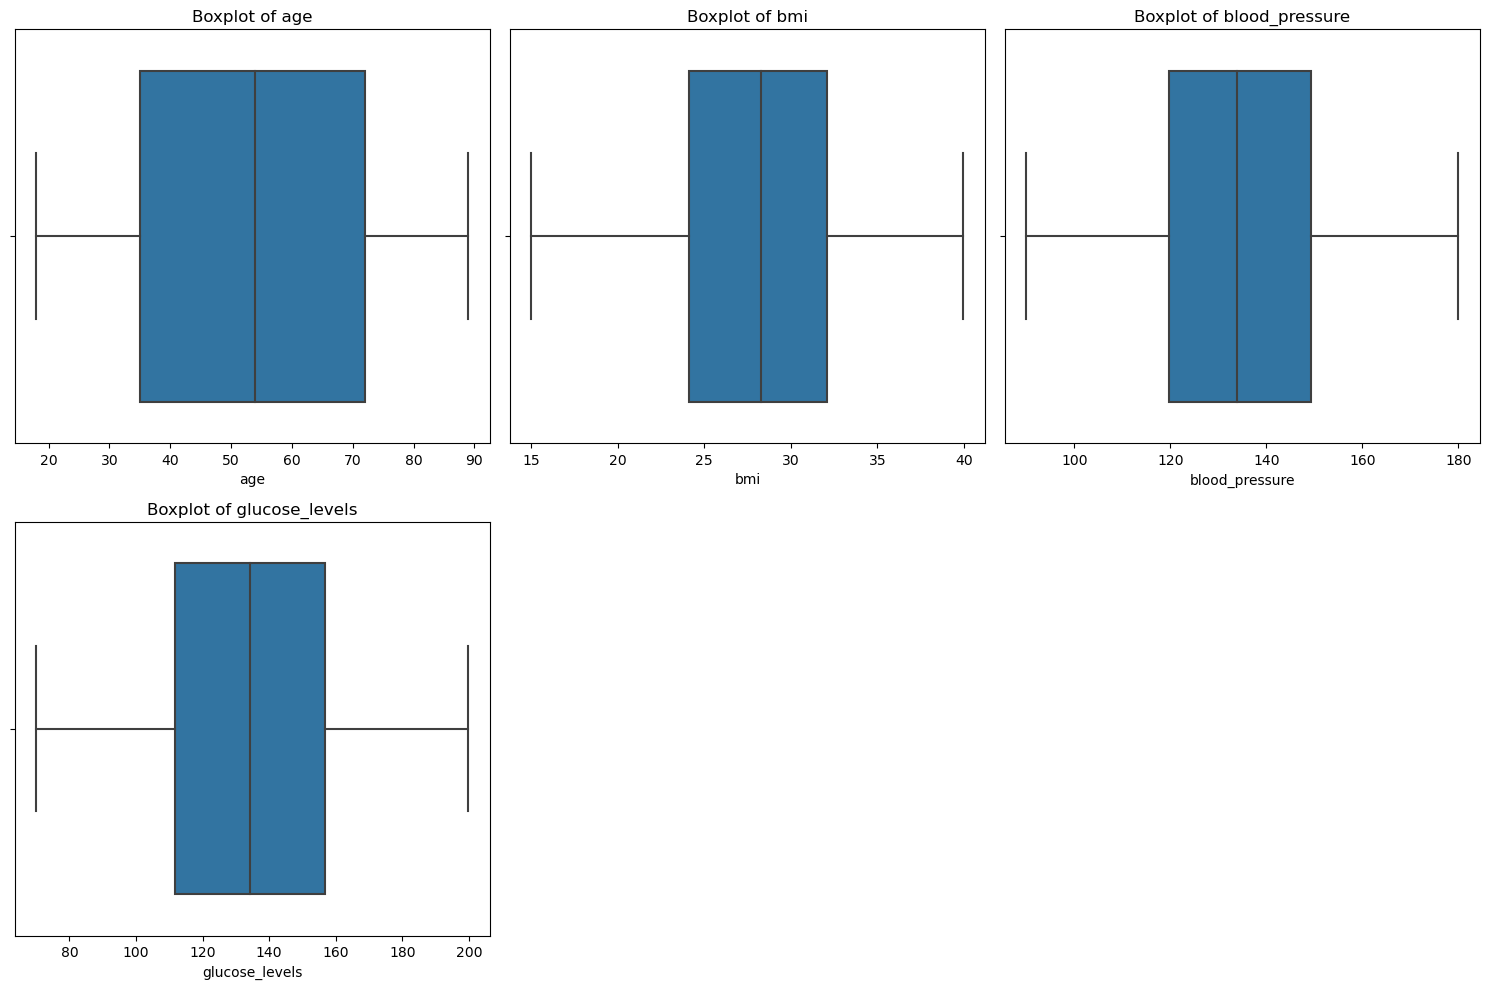

In [25]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols)-1)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Separate features and target
y = df['smoking_status'] 
encod3 = LabelEncoder()
y = encod3.fit_transform(y) 

# Step 2: Define columns for encoding
onehot_cols = ["gender"]
ordinal_cols = ["condition"]
feature_cols = [col for col in df.columns if col not in (["smoking_status"])]  # all features except target

# Step 3: Define ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('gender_onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols),
    ('condition_ordinal', OrdinalEncoder(categories=[["Diabetic", "Pneumonia", "Cancer"]]), ordinal_cols)
], remainder="passthrough")

# Step 4: Fit and transform only features
X = ct.fit_transform(df[feature_cols])  # Only features, not target

# Step 5: Create column names for the new DataFrame
new_columns = []
new_columns += list(ct.named_transformers_['gender_onehot'].get_feature_names_out(onehot_cols))  # OneHot names
new_columns += ordinal_cols  # Ordinal names
# Passthrough columns: all columns not encoded
passthrough_cols = [col for col in feature_cols if col not in onehot_cols + ordinal_cols]
new_columns += passthrough_cols

# Step 6: Reconstruct final X DataFrame
X = pd.DataFrame(X, columns=new_columns)
X.head()

,gender_female,gender_male,condition,age,bmi,blood_pressure,glucose_levels
0,0.0,1.0,0.0,30.0,27.767679,105.315064,155.717777
1,0.0,1.0,1.0,18.0,35.612486,128.984720,131.642471
2,0.0,1.0,0.0,76.0,34.624264,129.262145,114.600623
3,0.0,1.0,0.0,40.0,33.840723,115.678867,175.079771
4,0.0,1.0,2.0,49.0,26.600028,150.252560,153.151126


# Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler
# Specify the columns to scale
columns_to_scale = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
scaler = StandardScaler()
# Fit and transform 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()  

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,-1.125144,male,Non-Smoker,-0.034298,-1.471369,0.698014,Diabetic
1,-1.698670,male,Non-Smoker,1.348950,-0.284611,-0.089891,Pneumonia
2,1.073374,male,Non-Smoker,1.174701,-0.270702,-0.647615,Diabetic
3,-0.647205,male,Non-Smoker,1.036542,-0.951745,1.331668,Diabetic
4,-0.217060,male,Smoker,-0.240186,0.781723,0.614016,Cancer


# 2. Model Training and Evaluation 

I chose to evaluate **Logistic Regression, Random Forest, and Support Vector Machine (SVM)** models for this dataset to identify the most effective approach for predicting smoking status (smoker or non-smoker). **Logistic Regression** was selected for its simplicity, interpretability, and suitability for binary classification. It provides clear insights into how each feature—such as age, gender, and income—influences the likelihood of smoking, which is valuable for explaining the results. **Random Forest** was included due to its ability to capture complex, non-linear patterns and handle feature interactions automatically, making it robust and less prone to overfitting. It also handles imbalanced data more effectively through its ensemble nature. **SVM** was considered because of its effectiveness in high-dimensional spaces and its strong theoretical foundations for binary classification tasks. By comparing these three models, I was able to balance interpretability, predictive performance, and robustness, ultimately helping to identify the most appropriate model for this classification problem.


# Train Test Split 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1 - Logistic Regression 

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

LogisticRegression(max_iter=1000)

# Evaluation Metrics 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro):    {recall:.4f}")
print(f"F1 Score (Macro):  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


Accuracy:  0.9027
Precision (Macro): 0.4513
Recall (Macro):    0.5000
F1 Score (Macro):  0.4744

Confusion Matrix:
[[983   0]
 [106   0]]


# Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.90252294, 0.90355913, 0.90241102, 0.90241102, 0.90241102])

# 3. Hyperparameter Tuning using best parameters 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train Logistic Regression with best params
final_model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='lbfgs',
    max_iter=100,
    fit_intercept=True,
    random_state=42,
    class_weight='balanced'
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)

# New Evaluation Metrics 

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision (macro)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision:.4f}")

# Recall (macro)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (Macro): {recall:.4f}")

# F1 Score (macro)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Macro): {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.4086
Precision (Macro): 0.5015
Recall (Macro): 0.5041
F1 Score (Macro): 0.3554

Confusion Matrix:
[[379 604]
 [ 40  66]]


# Model 2 - Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_model

RandomForestClassifier(random_state=42)

# Evaluation Metrics 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# OOB Score
oob_score = rf_model.oob_score_

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"OOB Score: {oob_score:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8972
Precision (Macro): 0.4511
Recall (Macro): 0.4969
F1 Score (Macro): 0.4729
OOB Score: 0.8955

Confusion Matrix:
[[977   6]
 [106   0]]


# Cross Validation 

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89678899, 0.8989667 , 0.89667049, 0.89667049, 0.8978186 ])

# Hyperparameter Tuning using best parameters 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Create a pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and predictions
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)


# New Evaluation Metrics 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Re-train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# --- Random Forest Evaluation ---
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (Macro):", precision_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("Recall (Macro):", recall_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("F1 Score (Macro):", f1_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("OOB Score:", rf_model.oob_score_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8971533516988063
Precision (Macro): 0.45106186518928904
Recall (Macro): 0.4969481180061038
F1 Score (Macro): 0.47289448209099716
OOB Score: 0.8955463728191001
Confusion Matrix:
 [[977   6]
 [106   0]]




# Model 3 - SVM (Support Vector Machine)

In [41]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_model

SVC()

# Evaluation Metrics 

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8972
Precision (Macro): 0.4511
Recall (Macro): 0.4969
F1 Score (Macro): 0.4729

Confusion Matrix:
[[977   6]
 [106   0]]


# Cross Validation 

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89678899, 0.8989667 , 0.89667049, 0.89667049, 0.8978186 ])

# Hyperparameter Tuning with best parameters 

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train SVM with selected parameters
final_model = SVC(
    C=0.01,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)


# New Evaluation Metrics

In [45]:
# --- SVM Evaluation ---
y_pred_svm = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (Macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9026629935720845
Precision (Macro): 0.45133149678604223
Recall (Macro): 0.5
F1 Score (Macro): 0.4744208494208494
Confusion Matrix:
 [[983   0]
 [106   0]]


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Choosing the best model 

Among the three models—Logistic Regression, Random Forest, and SVM—the SVM (Support Vector Machine) emerges as the best choice for this task based on evaluation metrics. It achieves the highest F1 Score (0.4744), which is the most balanced measure of model performance in terms of both precision and recall. Although Random Forest is close (F1: 0.4729), and has the advantage of a strong OOB Score (0.8955), the SVM slightly edges it out in terms of F1 performance. Logistic Regression falls behind with a notably lower F1 Score (0.3554), indicating it is less effective in balancing false positives and false negatives.

# Pipeline

In [46]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the pipeline with SVM
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender']),
                                                 ('condition_ordinal',
                                                  OrdinalEncoder(categories=[['Diabetic',
                                                                              'Pneumonia',
                                                                              'Cancer']]),
                                                  ['condition'])])),
                ('classifier', SVC(probability=True, random_state=42))])

# 4. Performance Impact on Models

In [49]:
import pandas as pd

# Define metrics for each model
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Precision': [0.5015, 0.4511, 0.4513],
    'Recall': [0.5041, 0.4969, 0.5000],
    'F1 Score': [0.3554, 0.4729, 0.4744],
    'OOB Score': [None, 0.8955, None]
}

# Create DataFrame
metrics_df = pd.DataFrame(data)
metrics_df

,Model,Precision,Recall,F1 Score,OOB Score
0,Logistic Regression,0.5015,0.5041,0.3554,NaN
1,Random Forest,0.4511,0.4969,0.4729,0.8955
2,SVM,0.4513,0.5000,0.4744,NaN


# 5. Visuals & Presentation: Comparison Bar Chart

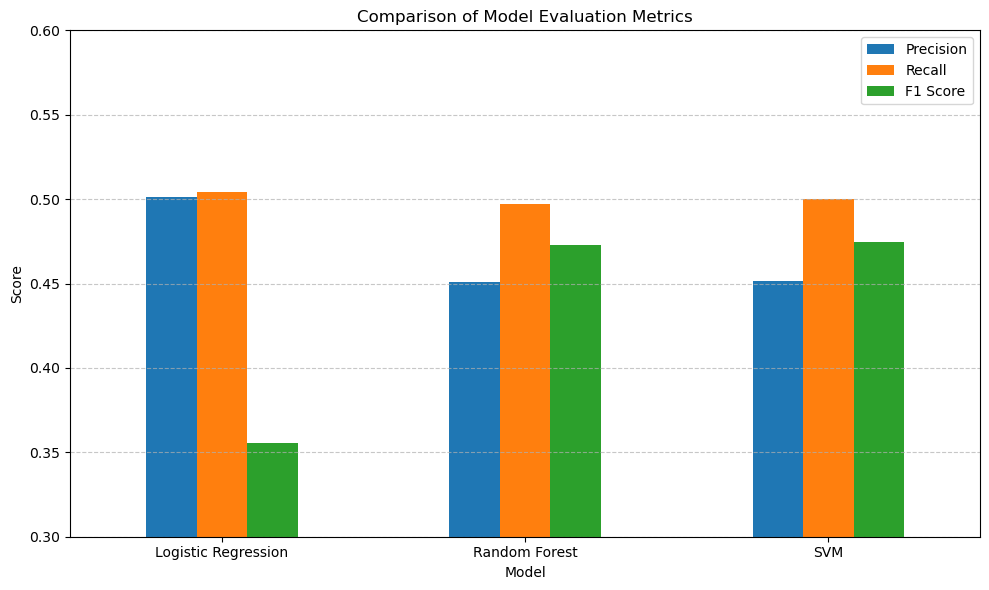

In [51]:
import matplotlib.pyplot as plt

# Plotting bar chart
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.set_index('Model')[['Precision', 'Recall', 'F1 Score']].plot.bar(ax=ax)

plt.title('Comparison of Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0.3, 0.6)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# 6. Interpretation and Conclusion 

The results indicate that SVM slightly outperforms Random Forest in terms of the F1 Score, making it the best model in this scenario for a balanced classification of smoking status. While Random Forest has a higher OOB score—signifying robust generalization ability—SVM’s marginally better F1 Score suggests better harmony between precision and recall. Logistic Regression, despite being interpretable and simpler, falls short in performance. Thus, SVM is the recommended model for optimal classification effectiveness in this context.